In [1]:
!pip install matplotlib

### Import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Dataset

In [4]:
dataset = pd.read_csv("../data/train.csv")
dataset.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name  Gender   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

### Identify missing data

In [6]:
dataset.isnull().head(2)

PassengerId  Survived  Pclass   Name  Gender    Age  SibSp  Parch  Ticket  \
0        False     False   False  False   False  False  False  False   False   
1        False     False   False  False   False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False   True     False  
1  False  False     False

In [7]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
dataset.shape

(891, 12)

In [11]:
dataset[dataset.Age.isnull()].head(3)

PassengerId  Survived  Pclass                          Name  Gender  Age  \
5             6         0       3              Moran, Mr. James    male  NaN   
17           18         1       2  Williams, Mr. Charles Eugene    male  NaN   
19           20         1       3       Masselmani, Mrs. Fatima  female  NaN   

    SibSp  Parch  Ticket     Fare Cabin Embarked  
5       0      0  330877   8.4583   NaN        Q  
17      0      0  244373  13.0000   NaN        S  
19      0      0    2649   7.2250   NaN        C

### Deal With Missing data

In "Cabin" there are too many missing values, so we should drop this column, as it will not contribute to prediction of this data

In [14]:
dataset.drop("Cabin",axis=1,inplace=True)

In [16]:
dataset[:3]

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name  Gender   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S

In [17]:
dataset.Age.agg(["mean","median","max","min"])

mean      29.699118
median    28.000000
max       80.000000
min        0.420000
Name: Age, dtype: float64

### Data Visualization

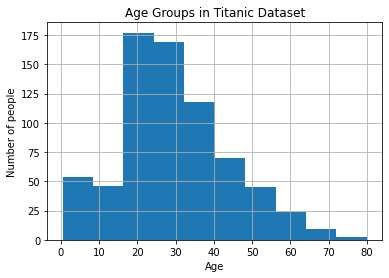

In [23]:
dataset.Age.hist()
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Age Groups in Titanic Dataset")
plt.show()

### Fill missing data

In [24]:
dataset.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
dataset.fillna({'Age':dataset.Age.median(),'Embarked':'S'}, inplace=True)

In [27]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64